## Done by Julián Ferreiro (jif245)

# Homework 02 --- Session 3, Multilinear regression

In [1]:
#Importing all the package needed for the answers.
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plot

%matplotlib inline

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [2]:
df1=pd.read_csv("data\H31.csv",index_col=0)

In [3]:
df1

,y,x1,x2,x3
1,0,1,-2,1
2,2,-1,-1,1
3,2,0,0,1
4,3,-1,1,1
5,3,1,2,1


#(a)
x3 serves as a dummy variable for the intercept

In [4]:
#(b) Calculate the coefficients  ŵ  manually or with python numpy module by using matrix computation

Y1=np.matrix(df1[["y"]])
X1=np.matrix(df1[["x1","x2","x3"]])


In [5]:
w = (X1.T * X1).I * X1.T * Y1
print w

[[-0.5]
 [ 0.7]
 [ 2. ]]


In [6]:
#(c)
#creating a linear model
lm1 = smf.ols(formula='y ~ x1+x2', data = df1).fit()
lm1.summary()

C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     59.00
Date:                Sun, 22 Oct 2017   Prob (F-statistic):             0.0167
Time:                        11:15:49   Log-Likelihood:                 2.6854
No. Observations:                   5   AIC:                            0.6293
Df Residuals:                       2   BIC:                           -0.5424
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000      0.100     20.000      0.002       1.570       2.430
x1            -0.5000      0.112     -4.472      0.047      -0.981      -0.019
x2             0.7000      0.071      9.899      0.010       0.396       1.004
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.600
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.352
Skew:                          -0.000   Prob(JB):                        0.839
Kurtosis:                       1.700   Cond. No.                         1.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

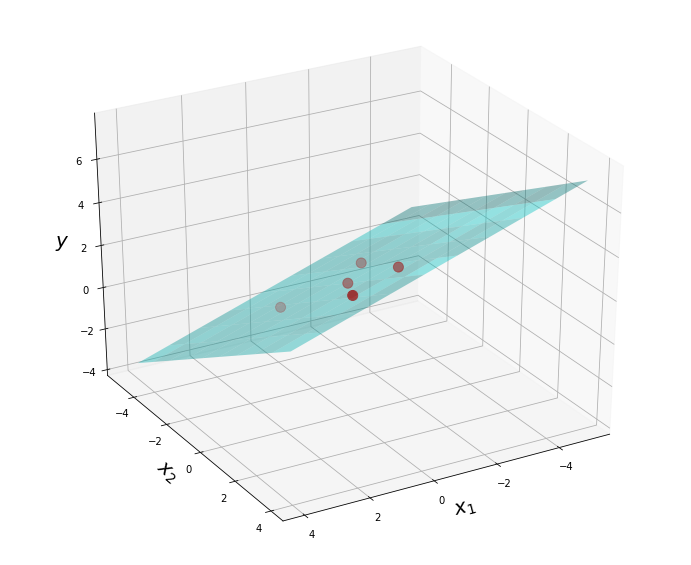

In [7]:
#(d)

fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(df1.x1, df1.x2, df1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size


# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x1 + lm1.params[2] * x2

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle



## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Per capita income
* Total population (for each zip code)
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage
* Population with No Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage
* (c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

In [8]:
df2=pd.read_csv("data\IncomeInsReg.csv",index_col=0)
df2.head(5)

,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage
Zipcode,,,,,,
10001,77512.0,22767,20809,5800,16795,1958
10002,26905.0,79490,70361,40139,35167,9129
10003,79088.0,56909,53135,8593,48522,3774
10004,98020.0,3024,2780,180,2705,244
10005,99633.0,7566,6996,122,6944,570


To check if someone has both types of coverages, we can sum Public and Private and check if that is greater than "WithCoverage".

We can define a function that does that:

In [9]:
def med(xyz):
    x,y,z=xyz
    if (x+y-z>0):
        return x+y-z        
    else:
        return 0

In [10]:
#Public+Private-WithCoverage>0, Both
df2["Both"]=df2[["Public","Private","WithCoverage"]].apply(med, axis=1)


In [11]:
df2.head(5)

,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both
Zipcode,,,,,,,
10001,77512.0,22767,20809,5800,16795,1958,1786
10002,26905.0,79490,70361,40139,35167,9129,4945
10003,79088.0,56909,53135,8593,48522,3774,3980
10004,98020.0,3024,2780,180,2705,244,105
10005,99633.0,7566,6996,122,6944,570,70


In [12]:
print "Previous lenght",len(df2)

df2=df2.dropna()

print "New lenght",len(df2)

Previous lenght 206
New lenght 181


In [13]:
#Changing to proportions and substracting "Both" from Public and Private
df2["WithCoverage"]=100*df2["WithCoverage"]/df2["TotalPop"]
df2["Public"]=100*(df2["Public"]-df2["Both"])/df2["TotalPop"]
df2["Private"]=100*(df2["Private"]-df2["Both"])/df2["TotalPop"]
df2["NoCoverage"]=100*df2["NoCoverage"]/df2["TotalPop"]
df2["Both"]=100*df2["Both"]/df2["TotalPop"]


In [14]:
df2.head()

,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both
Zipcode,,,,,,,
10001,77512.0,22767,91.399833,17.630781,65.924364,8.600167,7.844687
10002,26905.0,79490,88.515537,44.274752,38.019877,11.484463,6.220908
10003,79088.0,56909,93.368360,8.105923,78.268815,6.631640,6.993621
10004,98020.0,3024,91.931217,2.480159,85.978836,8.068783,3.472222
10005,99633.0,7566,92.466297,0.687285,90.853820,7.533703,0.925192


In [15]:
lm2 = smf.ols(formula='df2["IncomePerCapita"] ~ df2["Public"]+df2["Private"]+df2["WithCoverage"]+df2["Both"]', data = df2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     df2["IncomePerCapita"]   R-squared:                       0.622
Model:                                OLS   Adj. R-squared:                  0.616
Method:                     Least Squares   F-statistic:                     97.17
Date:                    Sun, 22 Oct 2017   Prob (F-statistic):           3.25e-37
Time:                            11:15:51   Log-Likelihood:                -2033.2
No. Observations:                     181   AIC:                             4074.
Df Residuals:                         177   BIC:                             4087.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -6.303e+04   2.76e+04     -2.280      0.024   -1.18e+05   -8485.237
df2["Public"]        -343.8174    165.645     -2.076      0.039    -670.712     -16.923
df2["Private"]        891.9091    109.045      8.179      0.000     676.713    1107.105
df2["WithCoverage"]   729.5941    232.488      3.138      0.002     270.789    1188.399
df2["Both"]           181.5024    194.652      0.932      0.352    -202.636     565.640
==============================================================================
Omnibus:                       46.950   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.094
Skew:                           1.213   Prob(JB):                     3.70e-21
Kurtosis:                       5.567   Cond. No.                     9.59e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.23e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R^2 is 0.622, this means that the model that includes "Public", "Private", "WithCoverage", "Both" explains 62% of the difference in income per capita across zip codes.

Besides that, we see that the "Public" coefficient has a negative value,indicating that the greater the percentage of public coverage, the less income per capita in that zip code.

Private and With Coverage seem to have an influence in determining the variance in the income across zipcodes. 

The "Both" coefficient is not significant, meaning that the influence of this variable in the income per capita is not statistically so relevant in this model. 

In [16]:
lm2.params

Intercept             -63030.644620
df2["Public"]           -343.817390
df2["Private"]           891.909080
df2["WithCoverage"]      729.594060
df2["Both"]              181.502371
dtype: float64

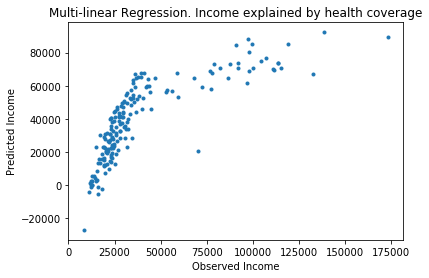

In [17]:
plt.plot(df2["IncomePerCapita"],df2["Public"]*lm2.params[1]+df2["Private"]*lm2.params[2]+df2["WithCoverage"]*lm2.params[3]+df2["Both"]*lm2.params[4] + lm2.params[0],".")
plt.ylabel("Predicted Income")
plt.xlabel('Observed Income')
plt.title("Multi-linear Regression. Income explained by health coverage");

In [18]:
#Correlation matrix
df2.corr()

,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both
IncomePerCapita,1.000000,-0.374920,0.602753,-0.746417,0.778040,-0.602753,0.101578
TotalPop,-0.374920,1.000000,-0.381392,0.443568,-0.433830,0.381392,-0.179863
WithCoverage,0.602753,-0.381392,1.000000,-0.556389,0.679430,-1.000000,0.344447
Public,-0.746417,0.443568,-0.556389,1.000000,-0.940209,0.556389,-0.201309
Private,0.778040,-0.433830,0.679430,-0.940209,1.000000,-0.679430,-0.024644
NoCoverage,-0.602753,0.381392,-1.000000,0.556389,-0.679430,1.000000,-0.344447
Both,0.101578,-0.179863,0.344447,-0.201309,-0.024644,-0.344447,1.000000



## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

In [19]:
df3=pd.read_csv("data\H33.csv")
df3.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


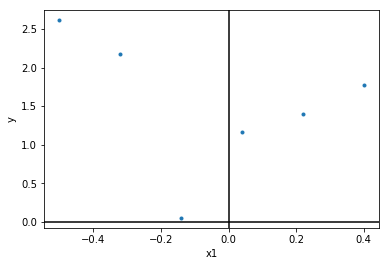

In [20]:
plt.plot(df3["x1"],df3["y"],".")
plt.xlabel("x1")
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')

In [21]:
df3["x2"]=df3["x1"]**2
df3["x3"]=df3["x1"]**3
df3["x4"]=df3["x1"]**4

In [22]:
df3.head()

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343


In [23]:
R2=[]
Params=[]

In [24]:
lm3_1 = smf.ols('y ~ x1', data = df3).fit()
R2.append(lm3_1.rsquared)
Params.append(lm3_1.params)

In [25]:
lm3_2 = smf.ols('y ~ x1+x2', data = df3).fit()
R2.append(lm3_2.rsquared)
Params.append(lm3_2.params)

In [26]:
lm3_3 = smf.ols('y ~ x1+x2+x3', data = df3).fit()
R2.append(lm3_3.rsquared)
Params.append(lm3_3.params)

In [27]:
lm3_4 = smf.ols('y ~ x1+x2+x3+x4', data = df3).fit()
R2.append(lm3_4.rsquared)
Params.append(lm3_4.params)

In [28]:
#The R are:
print R2
print Params

[0.10479617162381583, 0.65125881311682743, 0.66574886312199211, 0.80198630229302026]
[Intercept    1.484119
x1          -0.858791
dtype: float64, Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64, Intercept    0.839133
x1           0.686771
x2           6.690924
x3          -5.121962
dtype: float64, Intercept     0.469719
x1            2.350384
x2           22.552763
x3          -20.607719
x4          -77.428785
dtype: float64]


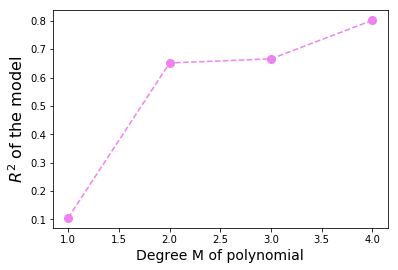

In [29]:
#(d) R^2$ increases as the degree of polynomial increases 
plt.plot(range(1,5),R2,'ro--',c="violet", markersize = 8)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16)
plt.show()

(e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
(e.1) Draw the original scatter plot of x1 and y
(e.2) Plot the curve of true function  f(x)=9x2−x+1
(e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases
(f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients  ŵ 


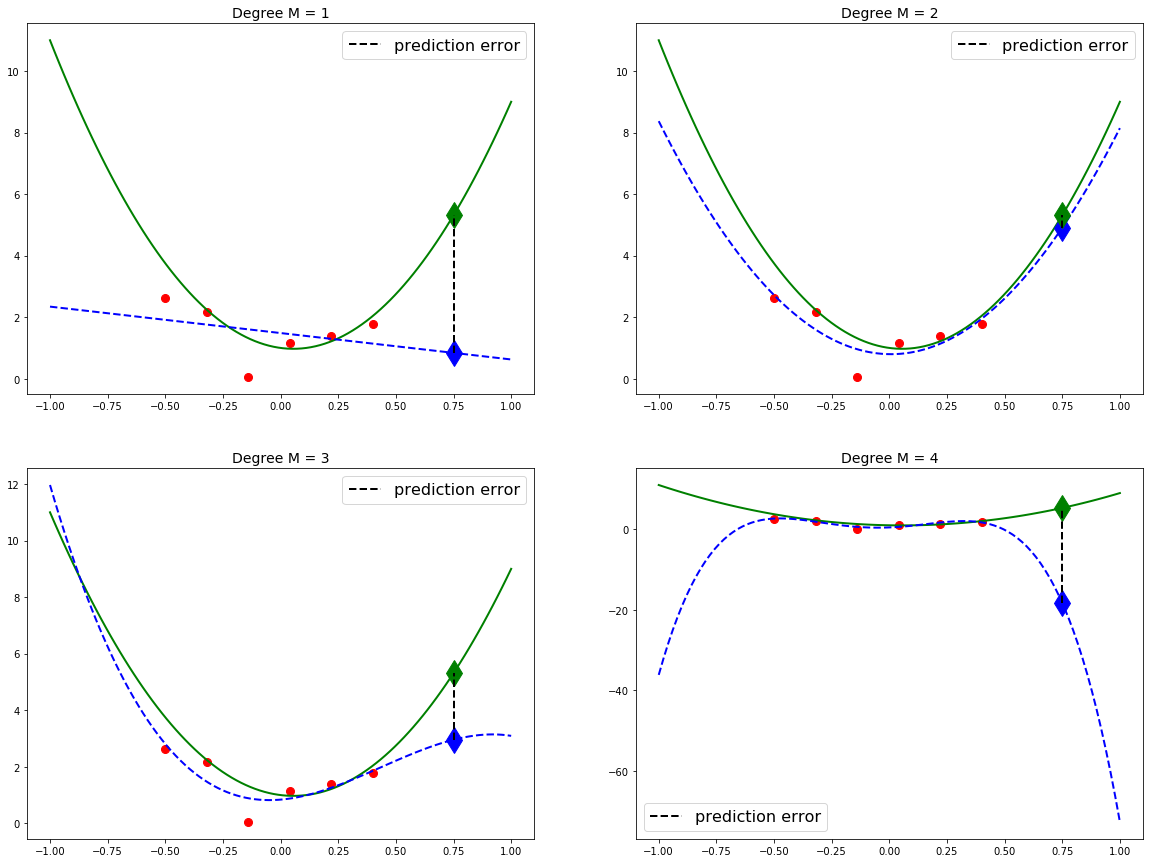

In [30]:
#Following code was authored by Stanislaw Sobolesky

plt.figure(figsize = (20,15))

f = lambda x: 9*x**2 - x + 1

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-1,1,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    y_future = 0
    x_future = 0.75
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(df3.x1, df3.y, 'ro', markersize = 8,label="")    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.plot(x_future, y_future, 'bd', markersize = 18)        # Blue star, fitted value
    plt.plot(x_future, f(x_future), 'gd', markersize = 18)     # Green star, true value
    plt.plot([x_future,x_future], [y_future, f(x_future)], 'k--',label="prediction error", lw = 2)
    plt.legend(fontsize = 16)
    plt.title('Degree M = %d'%(M), fontsize = 14)

#### Interpretation
According to the graph, the model that best fits the curve is the second degree model. 

The parameters/coefficients are:

In [31]:
lm3_2.params

Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64

Extra credit
(g) In each subfigure:
(g.1) Pick an x value (at your discretion)  x0x0 , then locate the y value both on your fitted curve and on our function curve ( f(x0)f(x0) )
(g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"